In [2]:
import torch
import torchvision
from torch import nn 
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from matplotlib import pyplot as plt

In [3]:
def to_img(x):
    x = 0.5 * (x+1)
    x = x.view(x.size(0), 28, 28)
    return x



In [4]:
# Displaying routine

def display_images(in_, out, n=1):
    for N in range(n):
        if in_ is not None:
            in_pic = to_img(in_.cpu().data)
            plt.figure(figsize=(18, 6))
            for i in range(4):
                plt.subplot(1,4,i+1)
                plt.imshow(in_pic[i+4*N])
                plt.axis('off')
        out_pic = to_img(out.cpu().data)
        plt.figure(figsize=(18, 6))
        for i in range(4):
            plt.subplot(1,4,i+1)
            plt.imshow(out_pic[i+4*N])
            plt.axis('off')

In [5]:
# Define data loading step

batch_size = 256

img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
])

dataset = MNIST('./data', transform = img_transform, download = True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle = True)


In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [7]:

# Define model architecture and reconstruction loss

# n = 28 x 28 = 784
d = 30  # for standard AE (under-complete hidden layer)
# d = 500  # for denoising AE (over-complete hidden layer)

class Autoencoder(nn.Module):

    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, d),
            nn.Tanh(),
        )

        self.decoder = nn.Sequential(
            nn.Linear(d, 28 * 28),
            nn.Tanh(),
        )
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

model = Autoencoder().to(device)
criterion = nn.MSELoss()


In [8]:
# Configure the optimiser

learning_rate = 1e-3

optimizer = torch.optim.Adam(
    model.parameters(),
    lr=learning_rate,
)

epoch [1/20], loss:0.1905
epoch [2/20], loss:0.1491
epoch [3/20], loss:0.1232
epoch [4/20], loss:0.1127
epoch [5/20], loss:0.1034
epoch [6/20], loss:0.0972
epoch [7/20], loss:0.0875
epoch [8/20], loss:0.0872
epoch [9/20], loss:0.0767
epoch [10/20], loss:0.0686
epoch [11/20], loss:0.0717
epoch [12/20], loss:0.0671
epoch [13/20], loss:0.0680
epoch [14/20], loss:0.0616
epoch [15/20], loss:0.0632
epoch [16/20], loss:0.0597
epoch [17/20], loss:0.0615
epoch [18/20], loss:0.0596
epoch [19/20], loss:0.0528
epoch [20/20], loss:0.0554


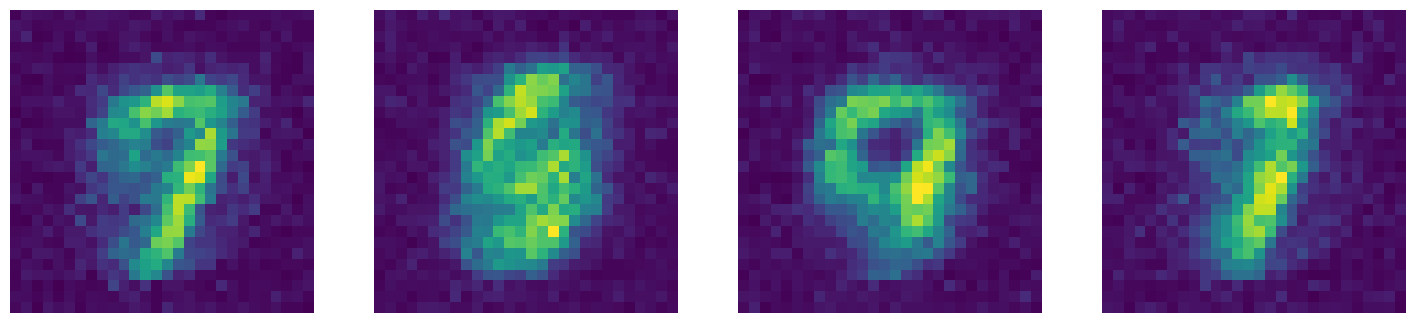

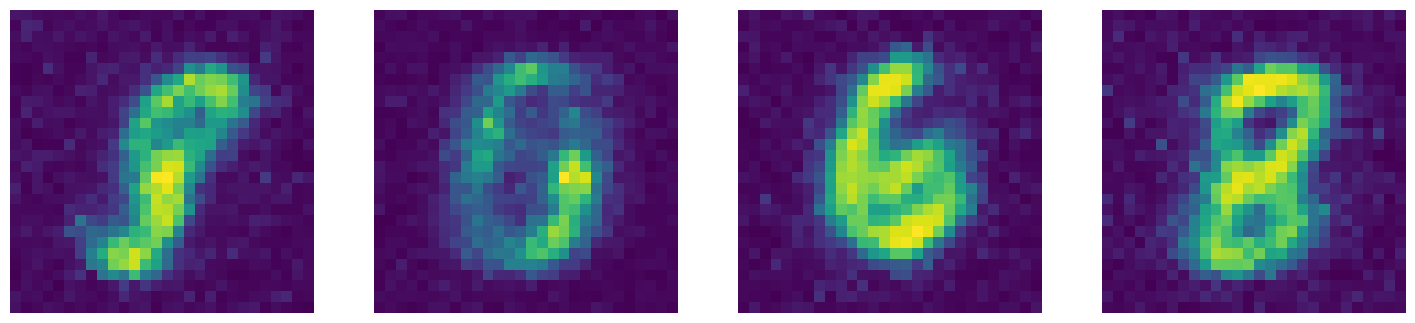

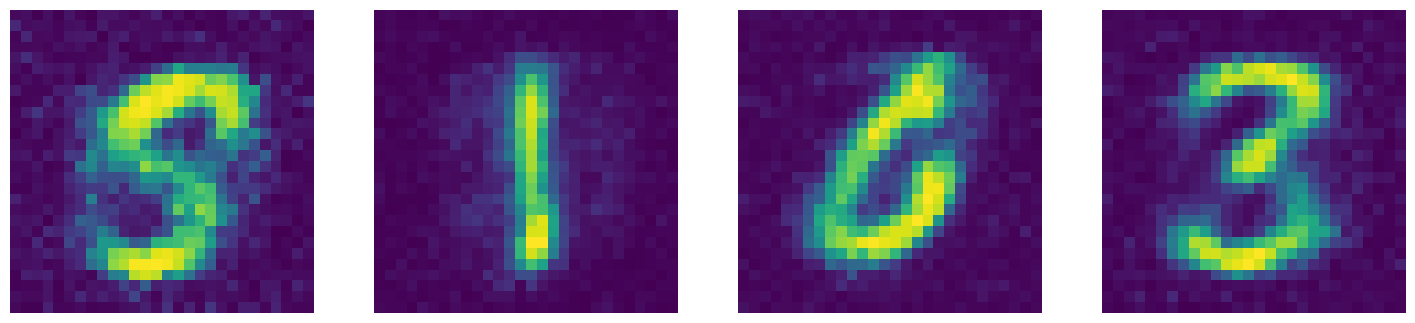

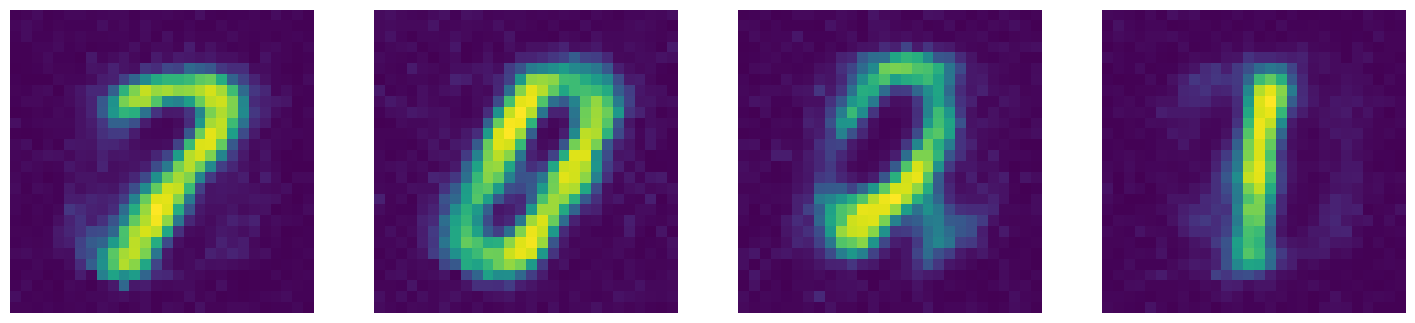

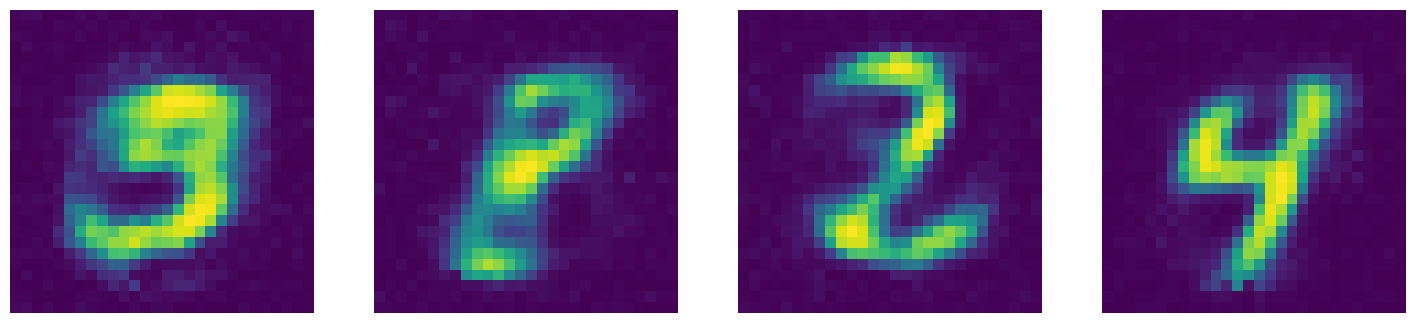

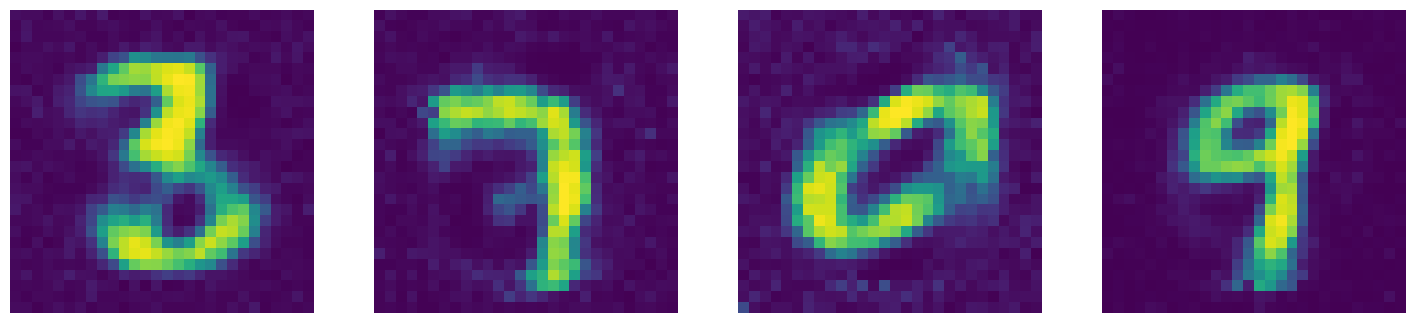

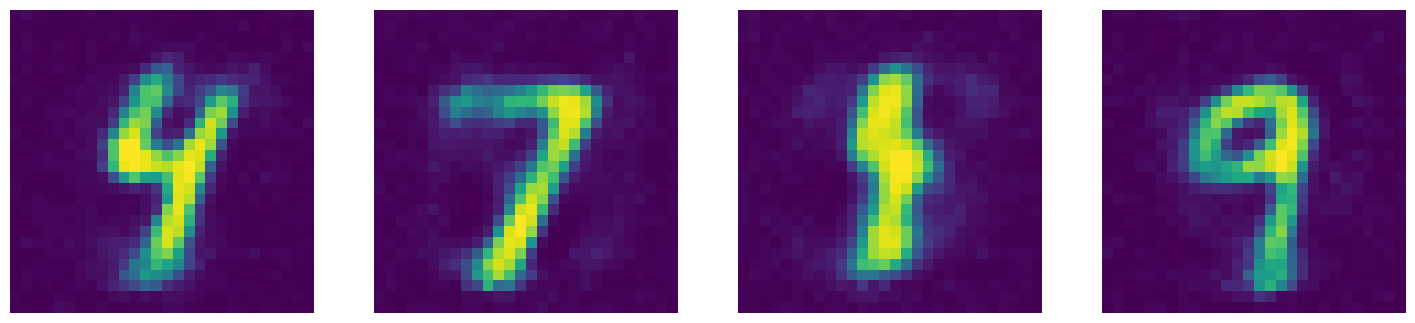

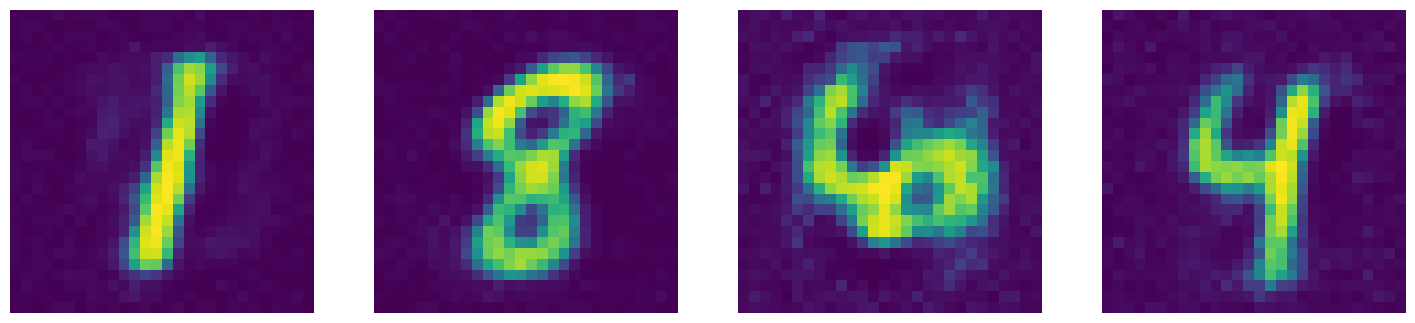

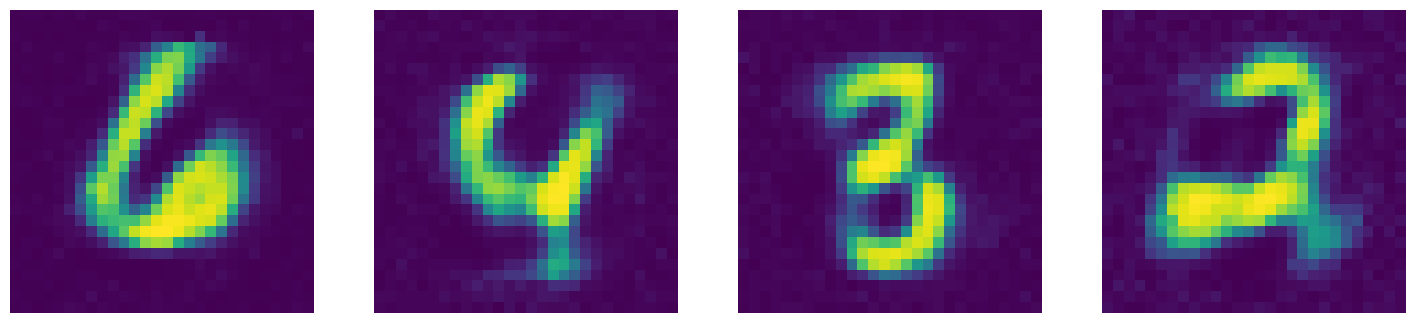

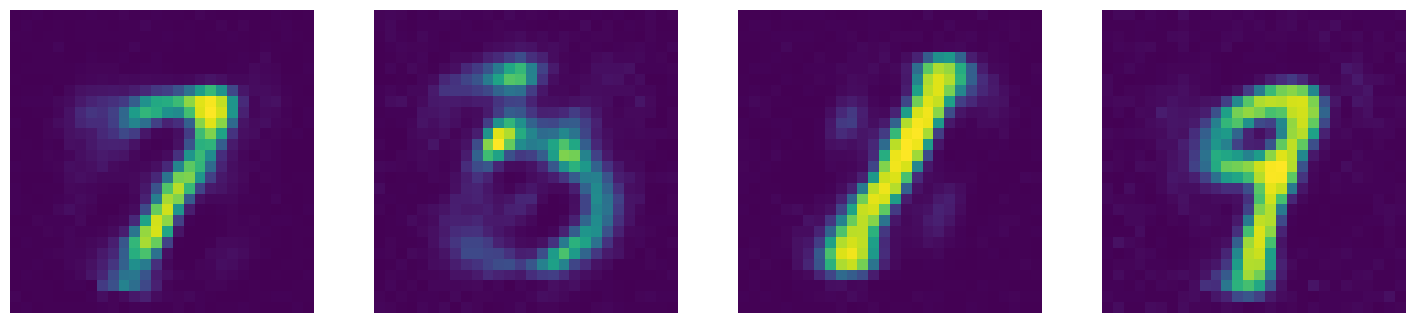

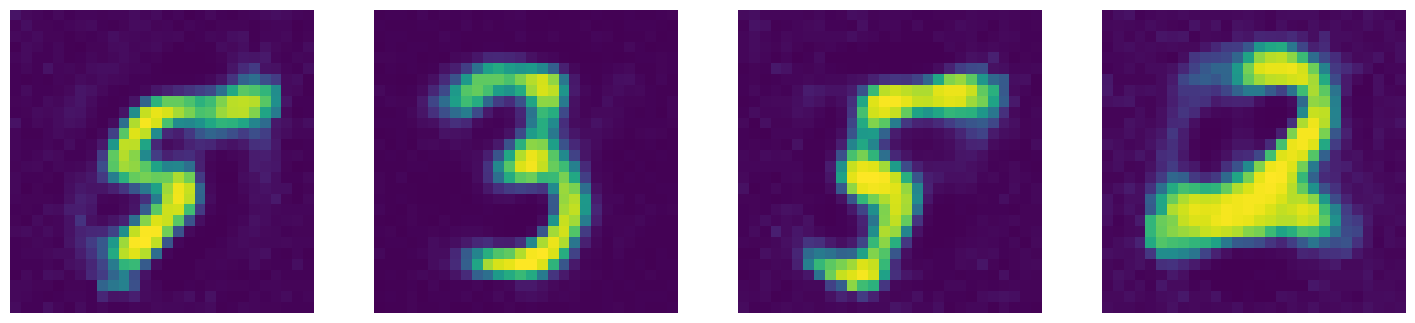

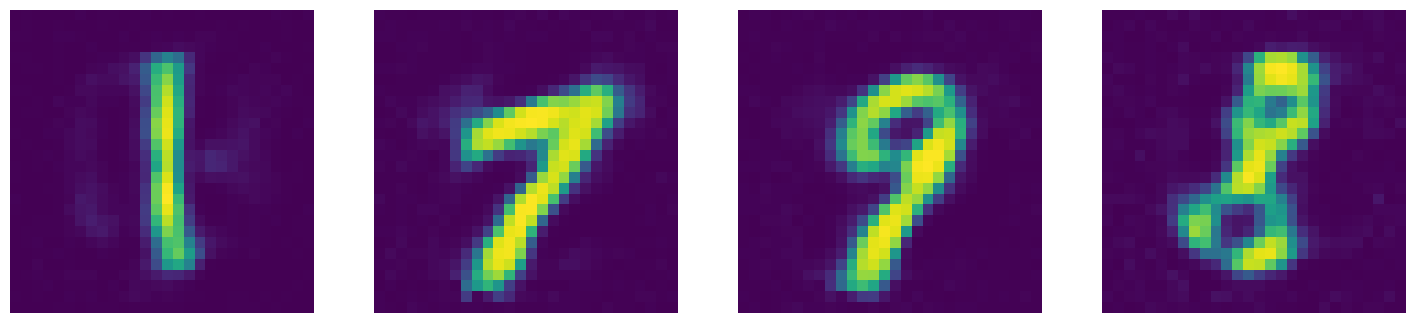

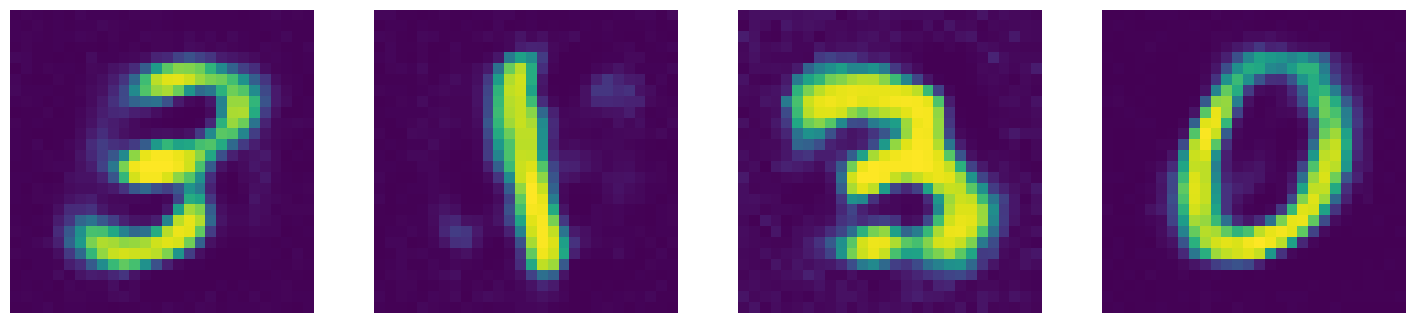

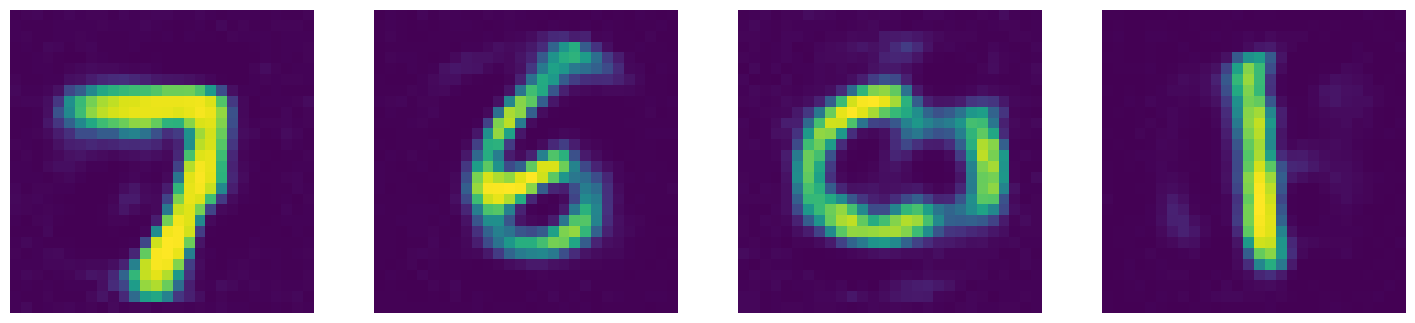

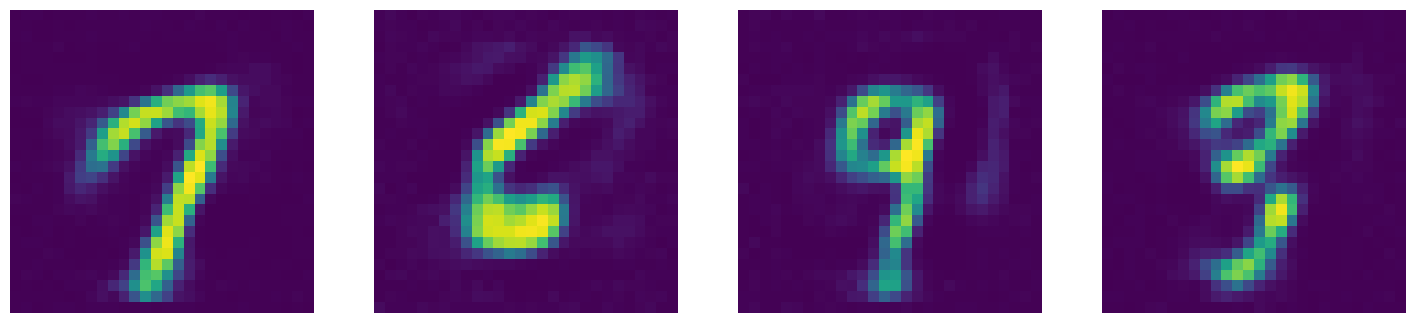

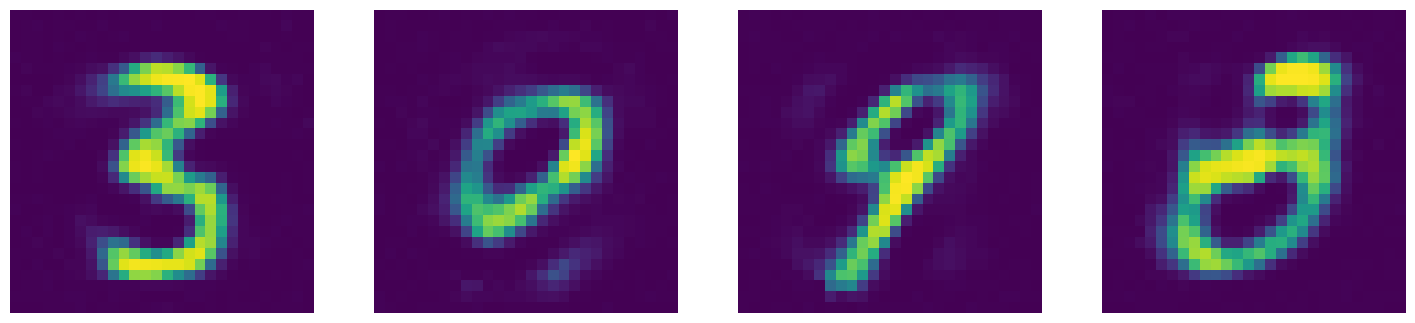

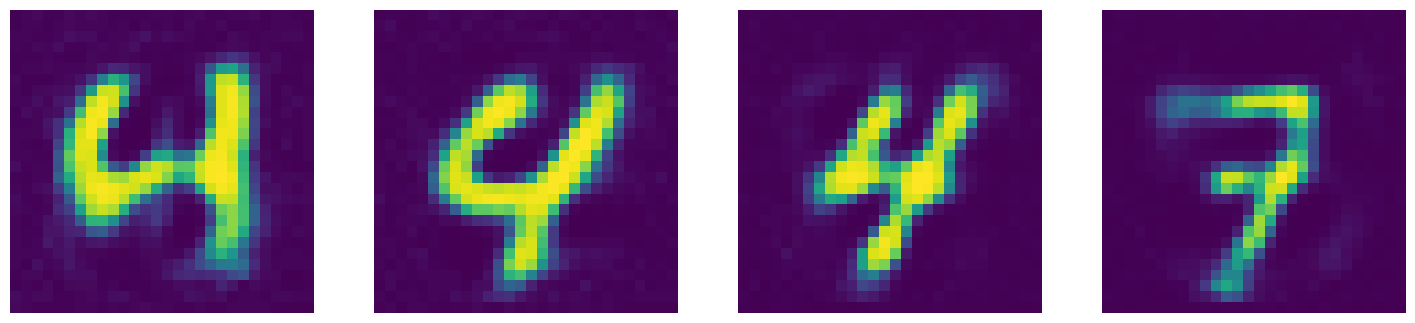

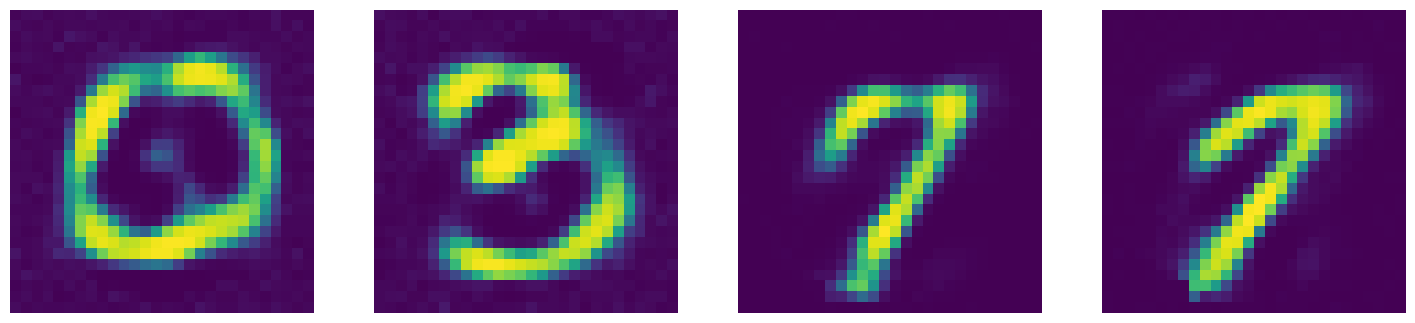

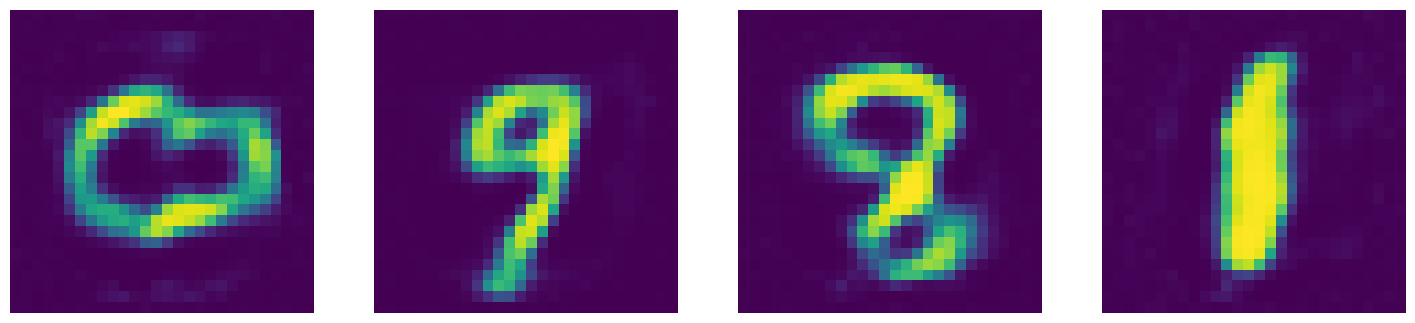

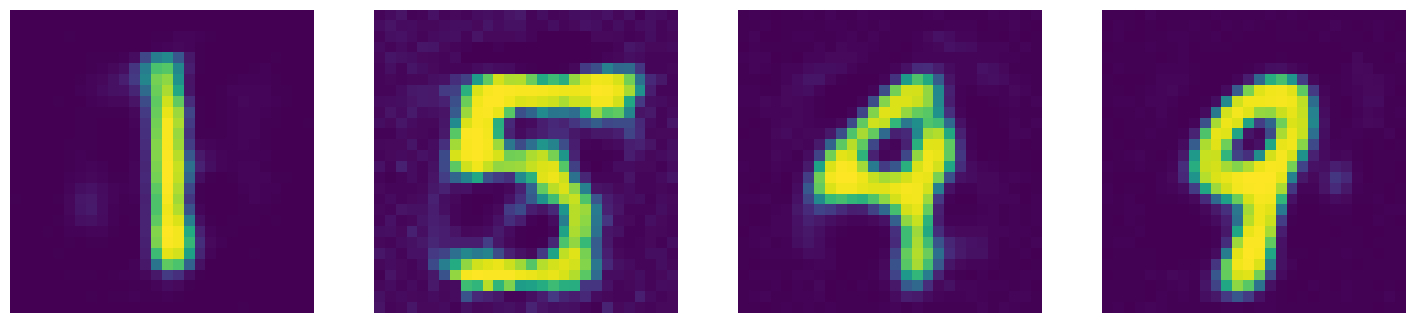

In [8]:

num_epochs = 20
# do = nn.Dropout()  # comment out for standard AE
for epoch in range(num_epochs):
    for data in dataloader:
        img, _ = data
        img = img.to(device)
        img = img.view(img.size(0), -1)
        # noise = do(torch.ones(img.shape)).to(device)
        # img_bad = (img * noise).to(device)  # comment out for standard AE
        # ===================forward=====================
        output = model(img)
        loss = criterion(output, img.data)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print(f'epoch [{epoch + 1}/{num_epochs}], loss:{loss.item():.4f}')
    display_images(None, output)


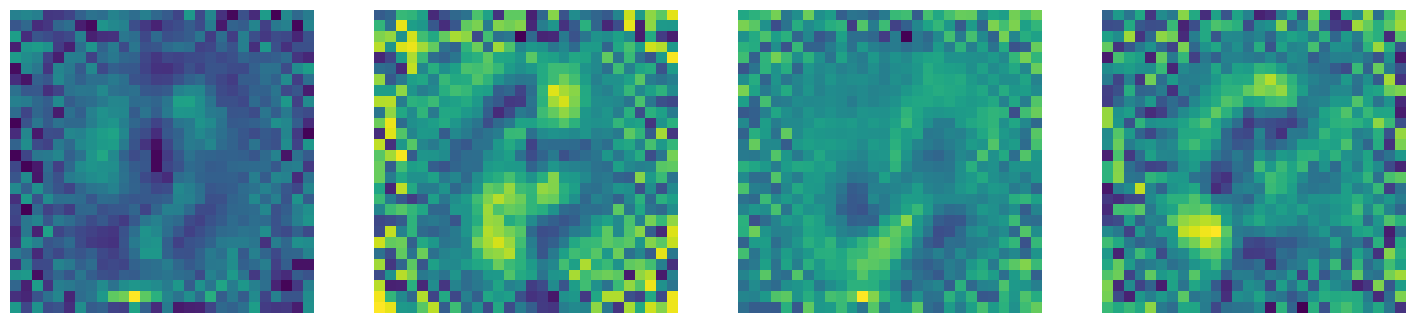

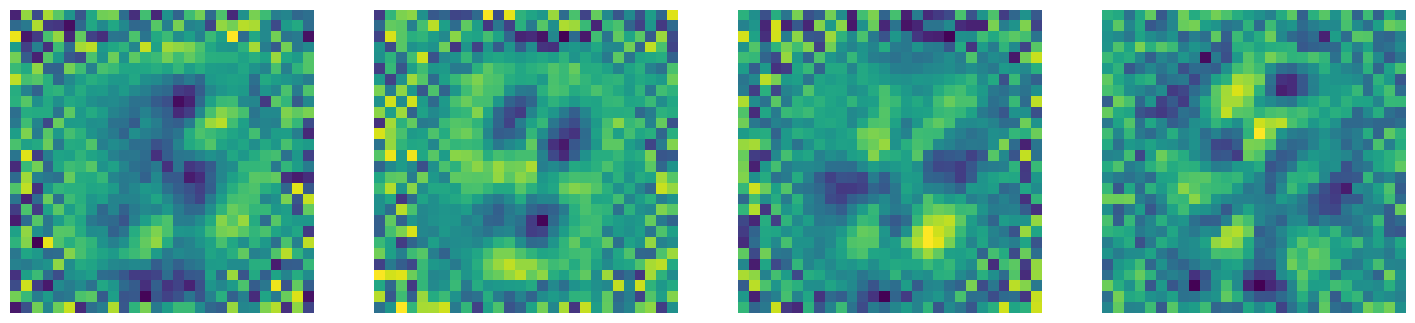

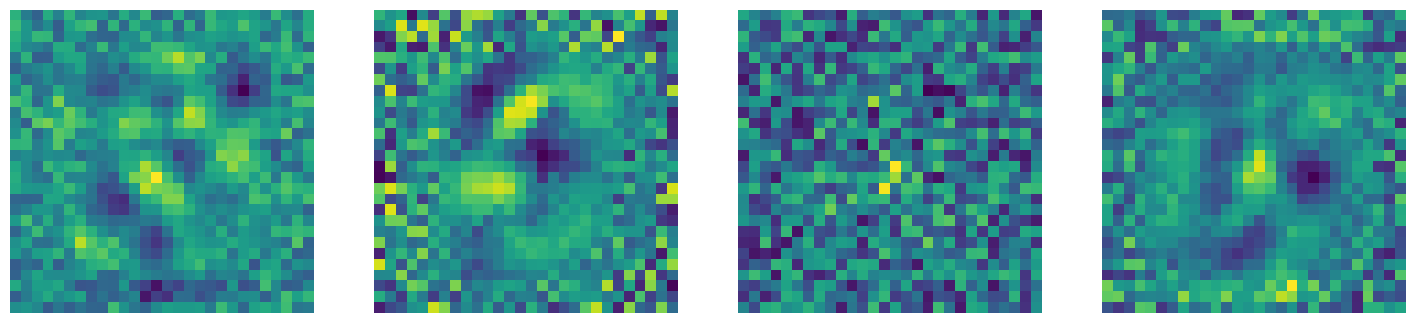

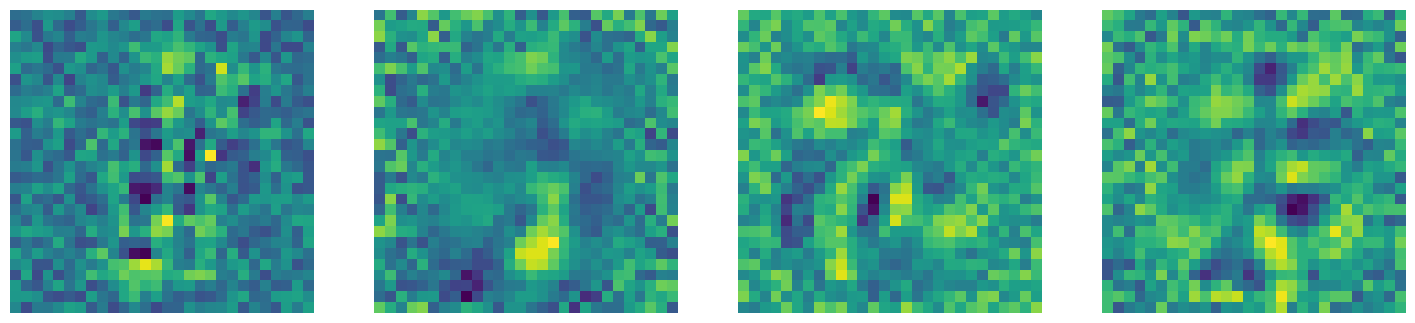

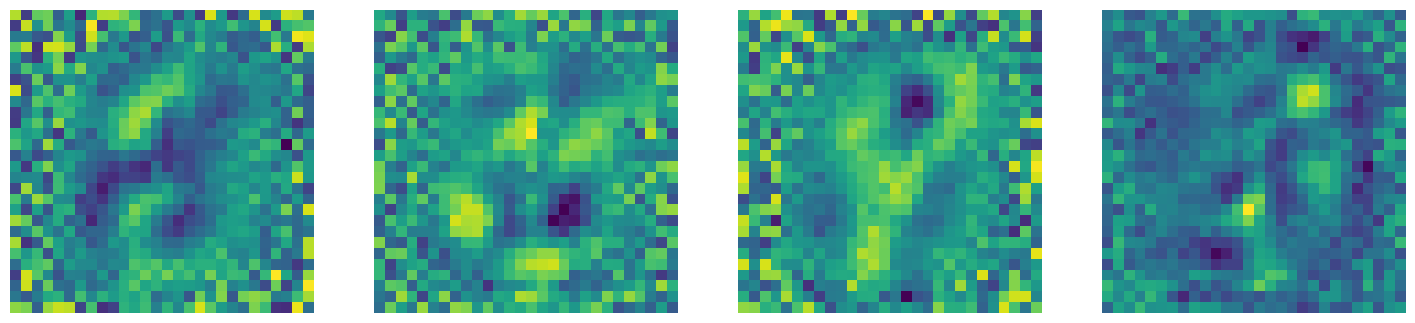

In [10]:
# Visualise a few kernels of the encoder

display_images(None, model.encoder[0].weight, 5)

epoch [1/20], loss:0.0340
epoch [2/20], loss:0.0193
epoch [3/20], loss:0.0141
epoch [4/20], loss:0.0106
epoch [5/20], loss:0.0092
epoch [6/20], loss:0.0082
epoch [7/20], loss:0.0067
epoch [8/20], loss:0.0063
epoch [9/20], loss:0.0063
epoch [10/20], loss:0.0063
epoch [11/20], loss:0.0056
epoch [12/20], loss:0.0057
epoch [13/20], loss:0.0045
epoch [14/20], loss:0.0046
epoch [15/20], loss:0.0046
epoch [16/20], loss:0.0041
epoch [17/20], loss:0.0040
epoch [18/20], loss:0.0037
epoch [19/20], loss:0.0038
epoch [20/20], loss:0.0038


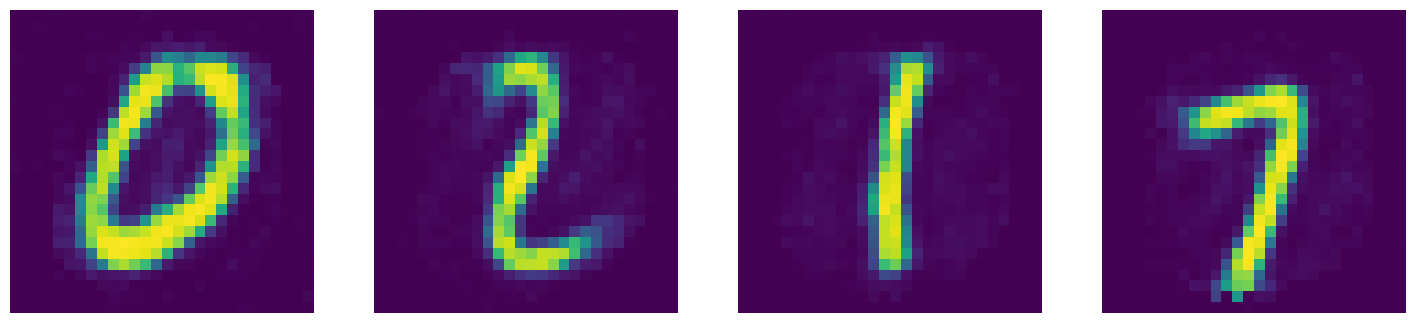

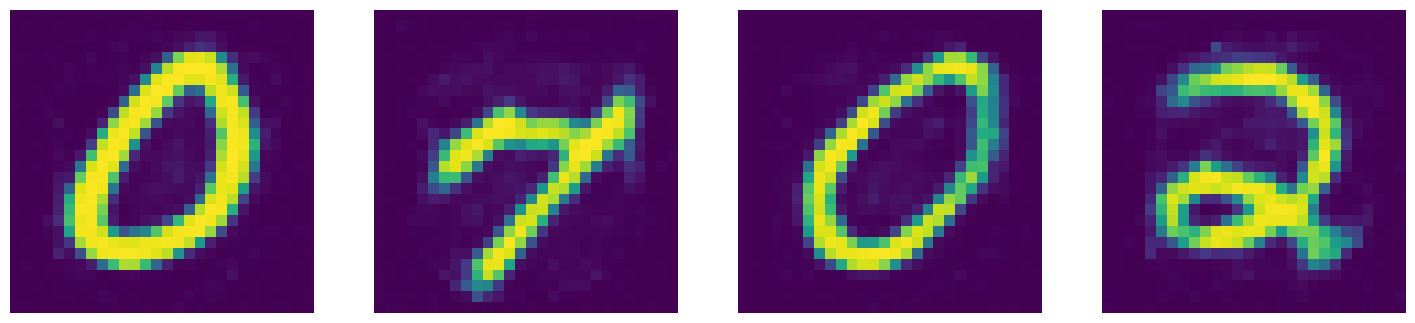

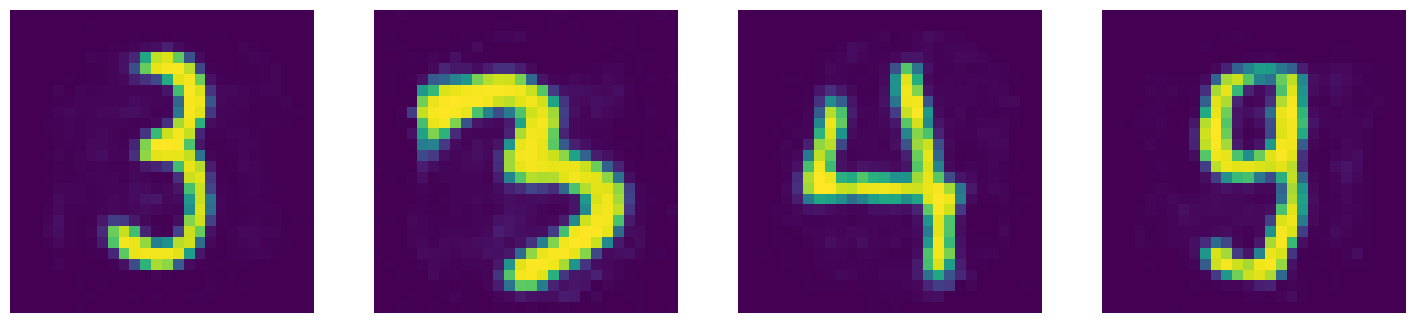

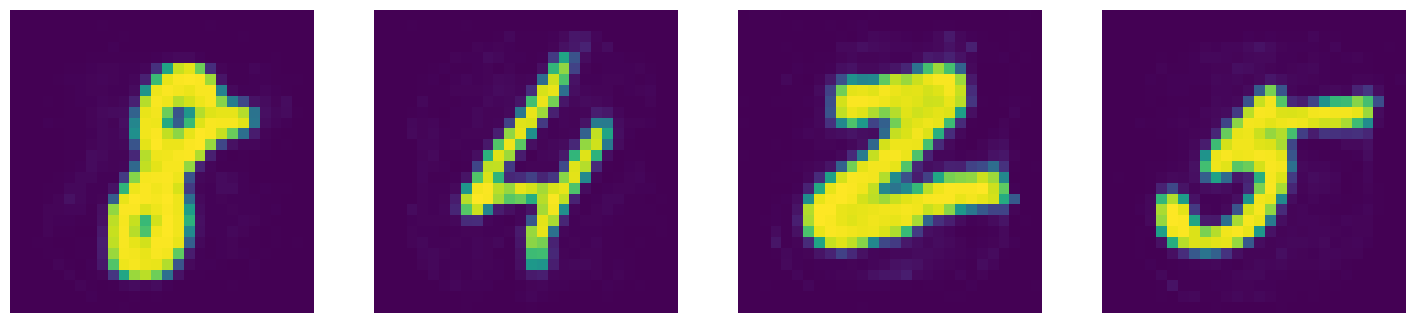

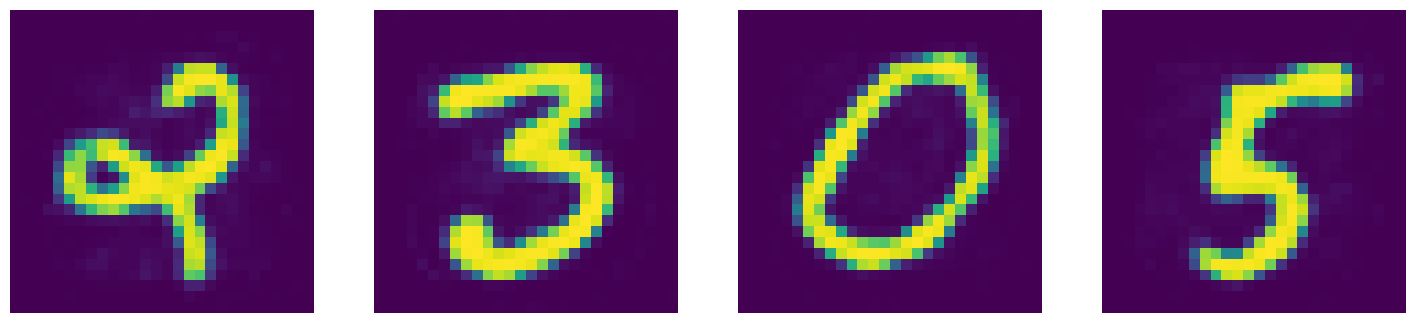

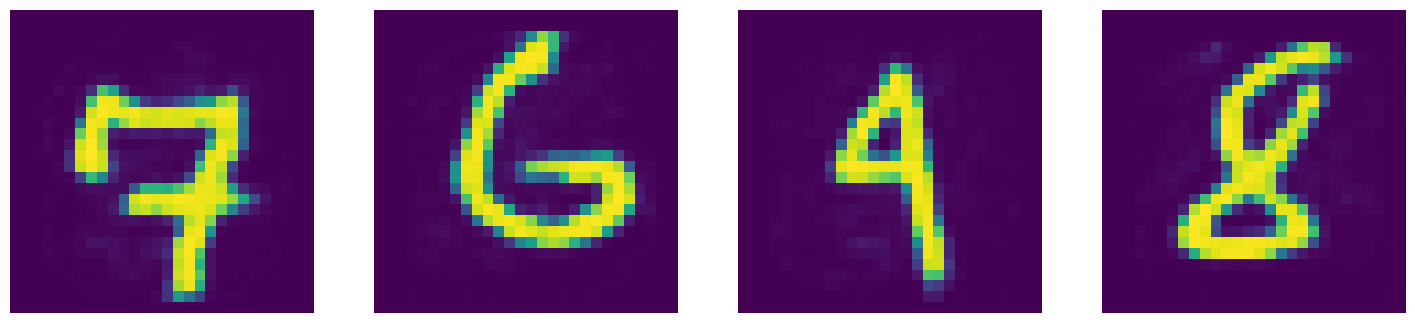

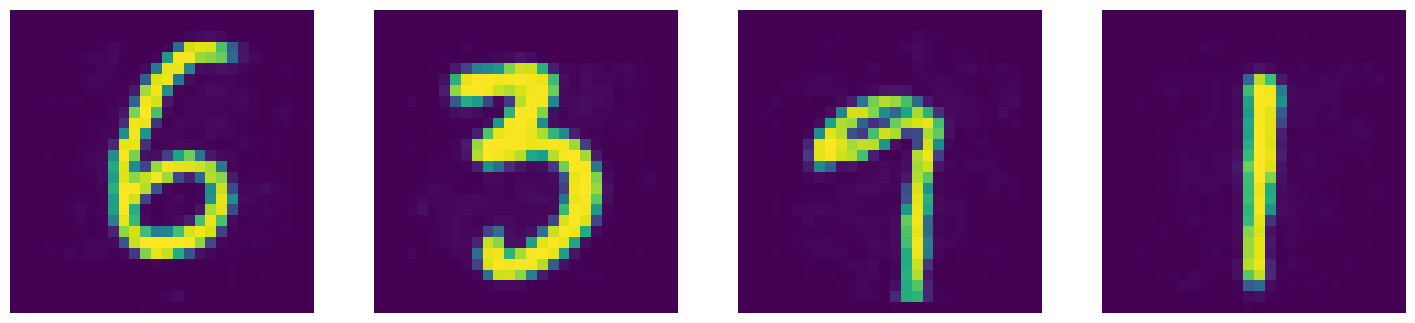

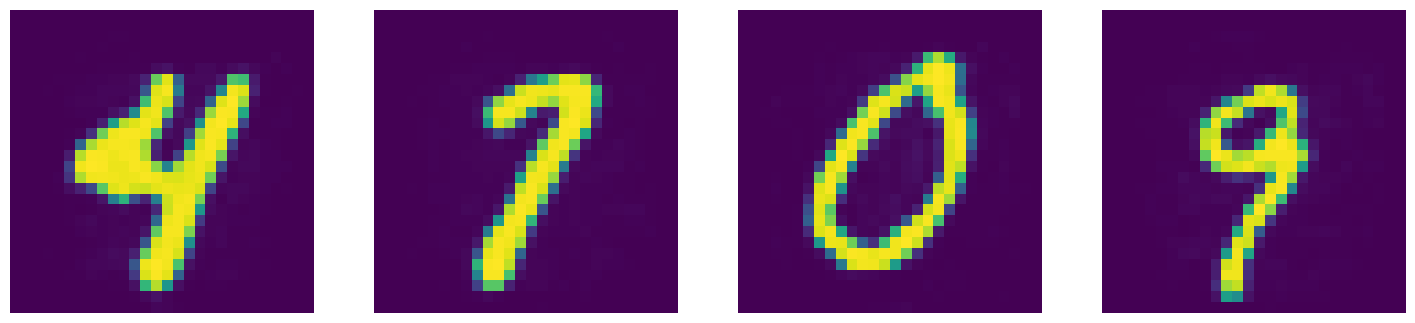

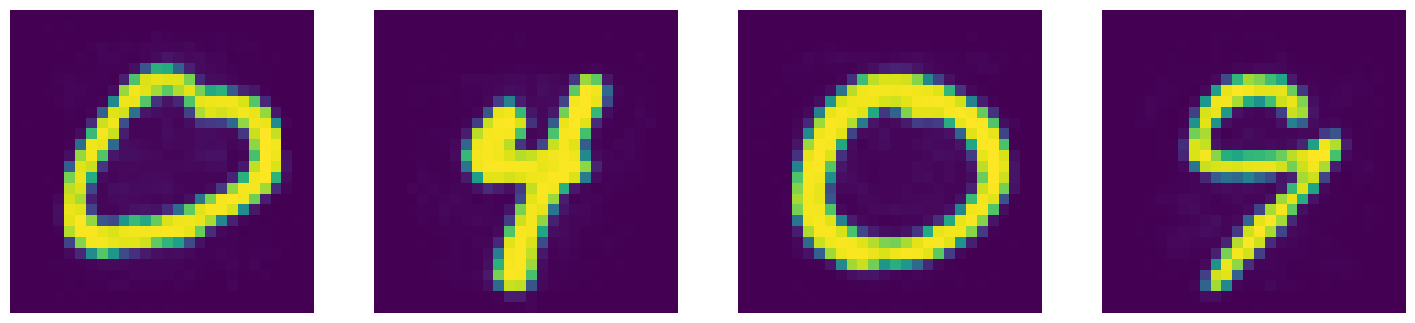

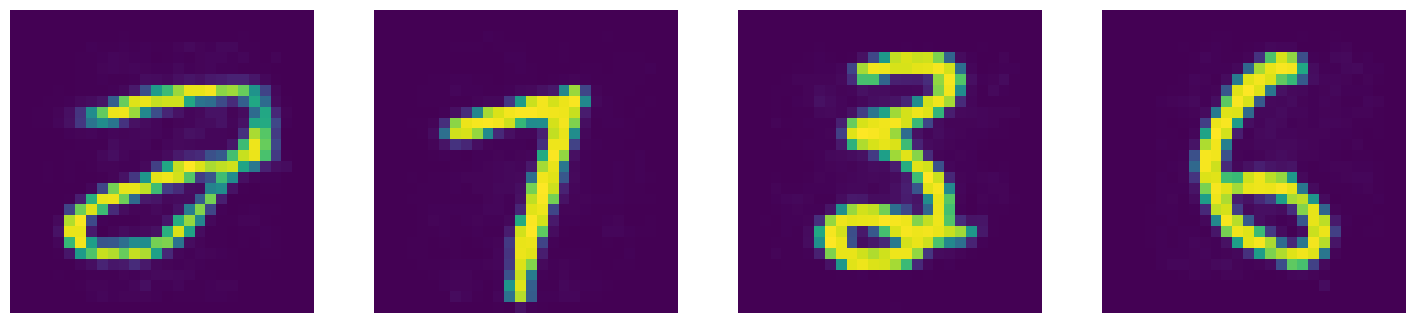

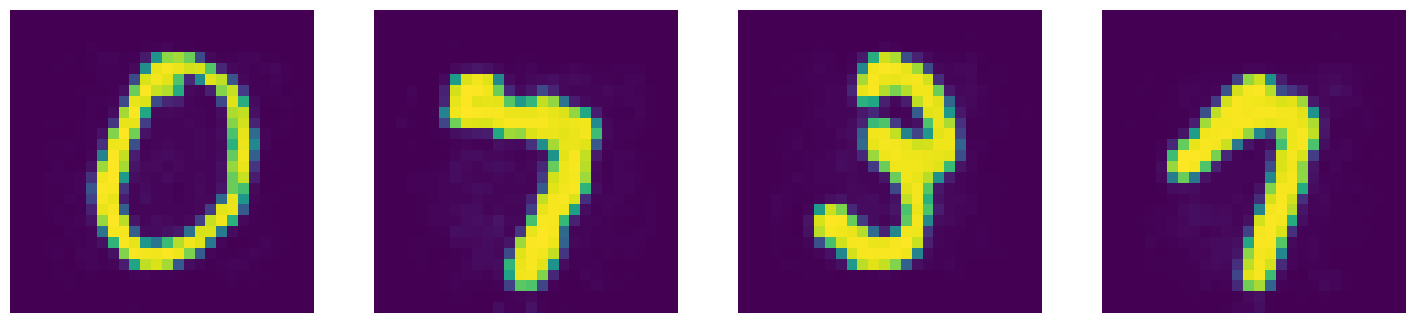

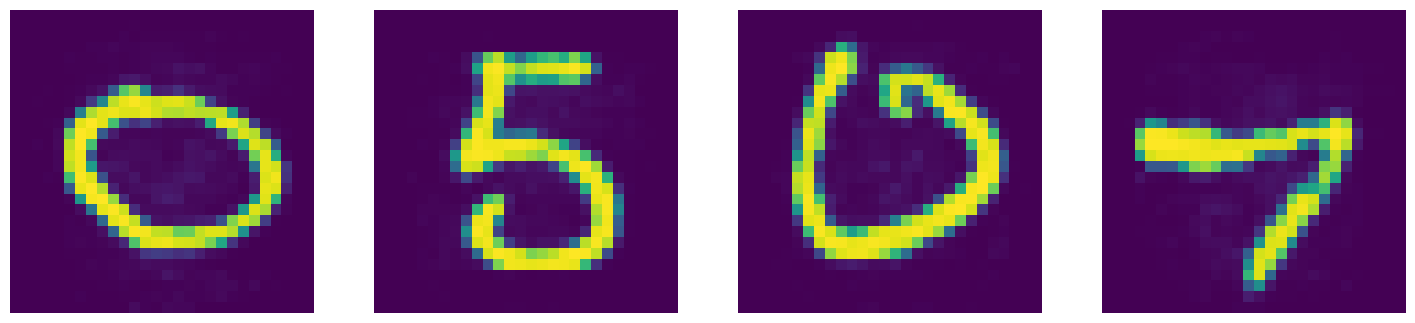

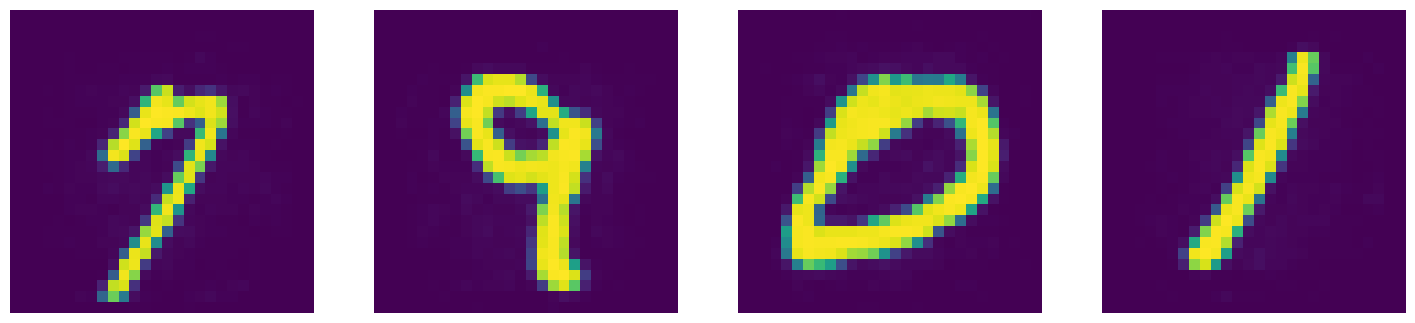

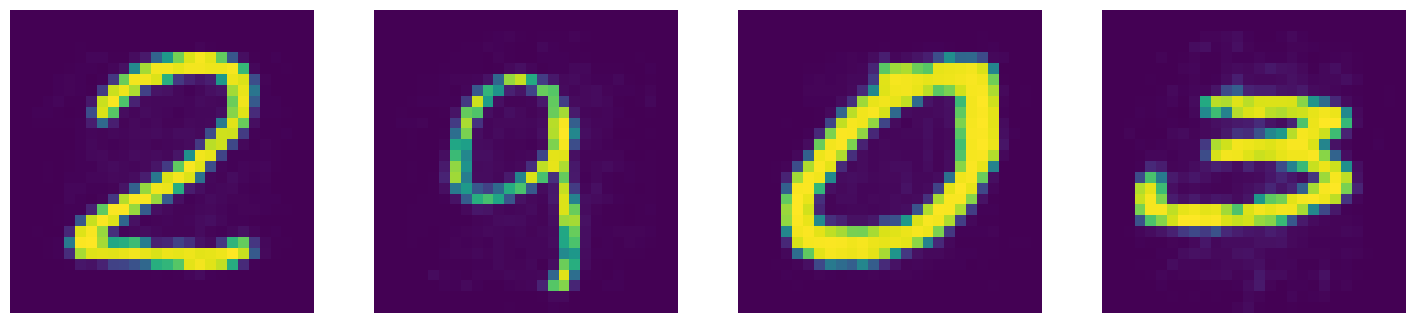

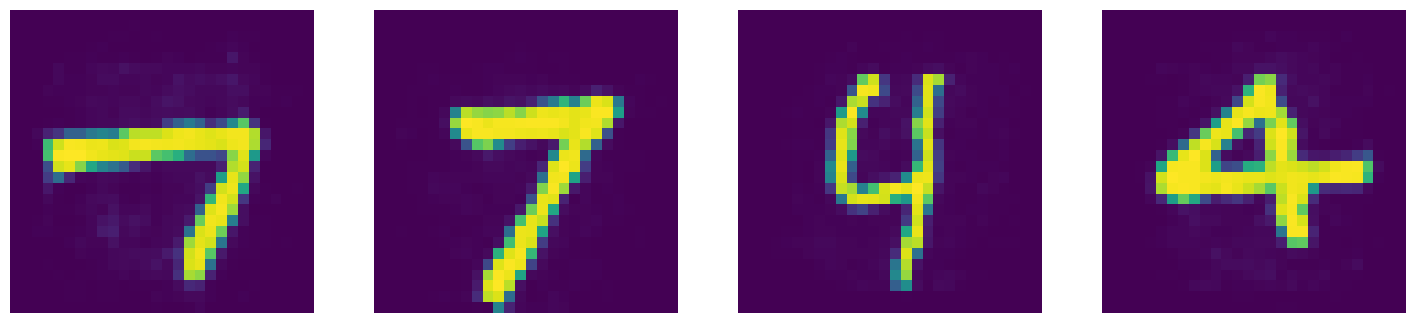

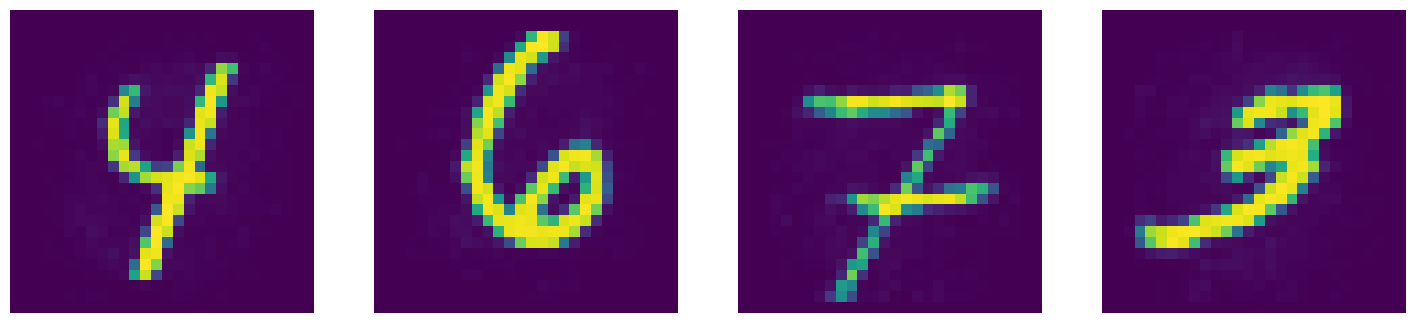

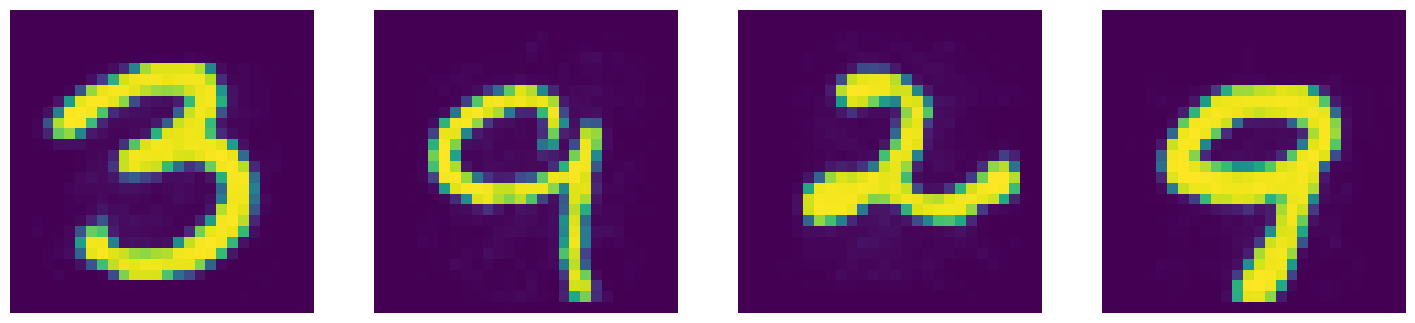

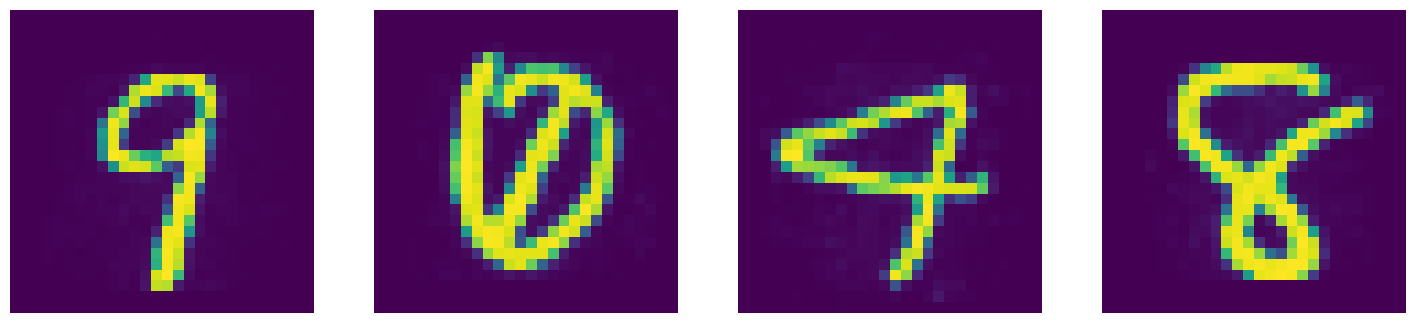

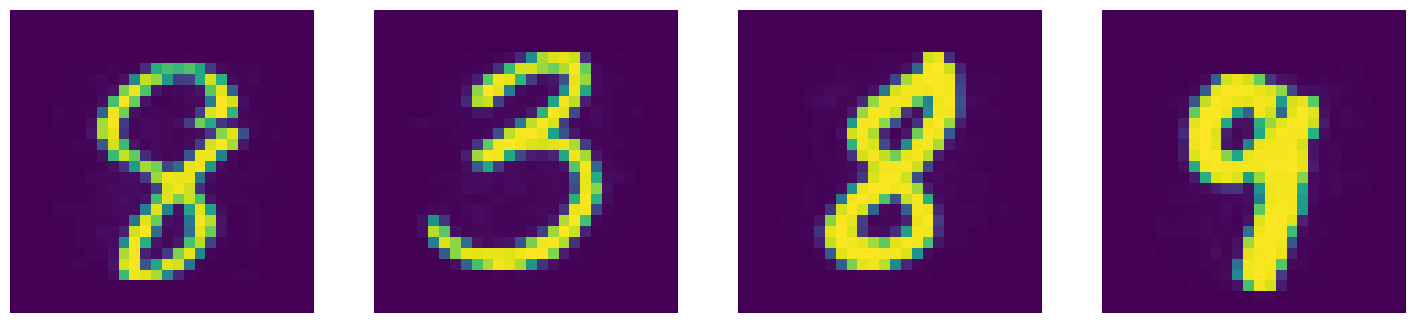

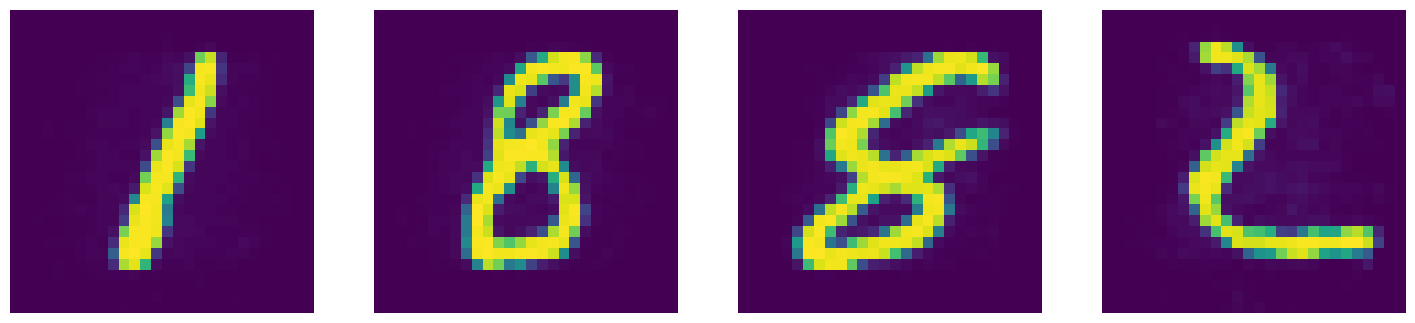

In [9]:
# over-complete autoencoder for non-denoised data

d = 500
model = Autoencoder().to(device)
optimizer = torch.optim.Adam(
    model.parameters(),
    lr=learning_rate,
)

num_epochs = 20
# do = nn.Dropout()  # comment out for standard AE
for epoch in range(num_epochs):
    for data in dataloader:
        img, _ = data
        img = img.to(device)
        img = img.view(img.size(0), -1)
        # noise = do(torch.ones(img.shape)).to(device)
        # img_bad = (img * noise).to(device)  # comment out for standard AE
        # ===================forward=====================
        output = model(img)
        loss = criterion(output, img.data)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print(f'epoch [{epoch + 1}/{num_epochs}], loss:{loss.item():.4f}')
    display_images(None, output)


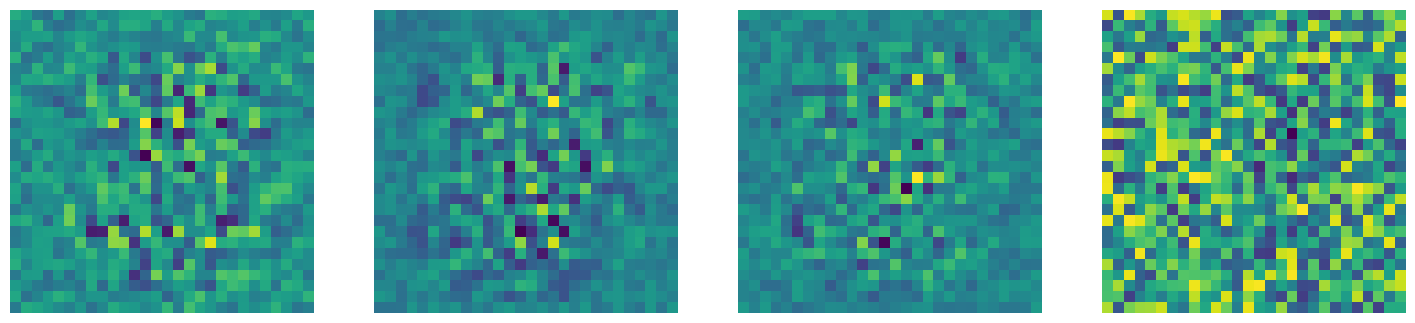

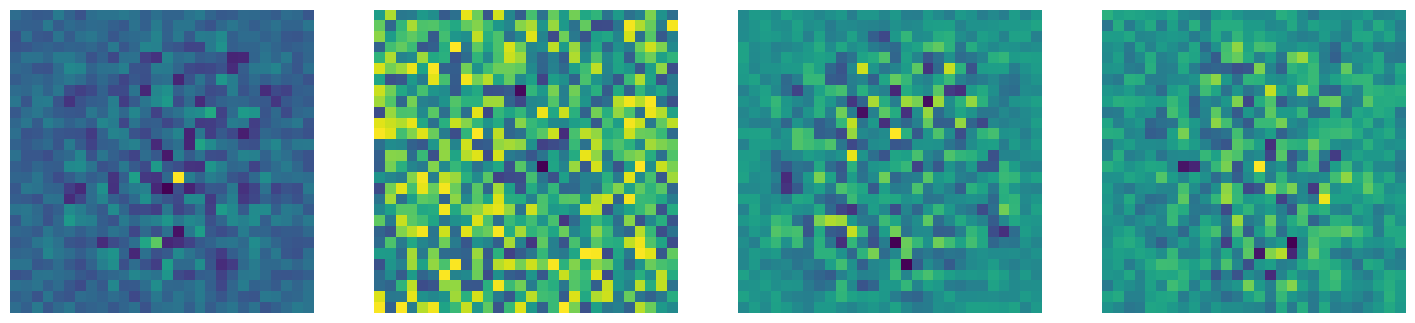

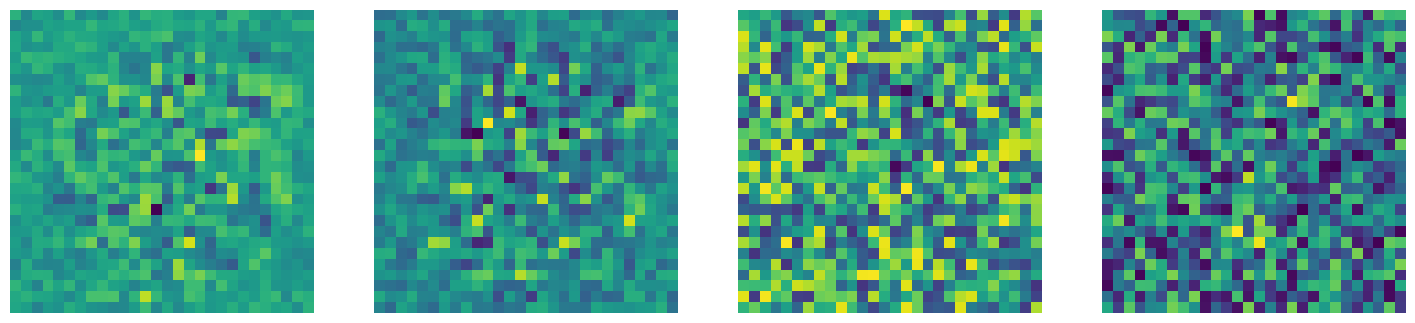

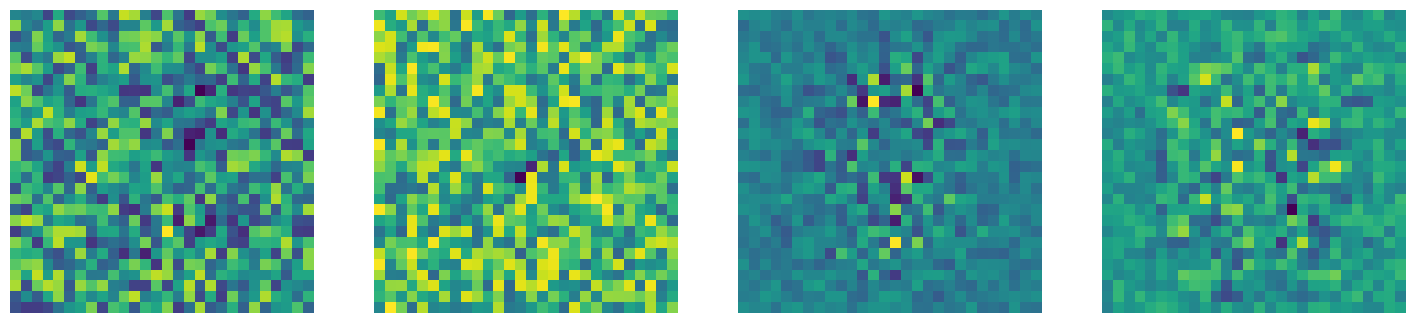

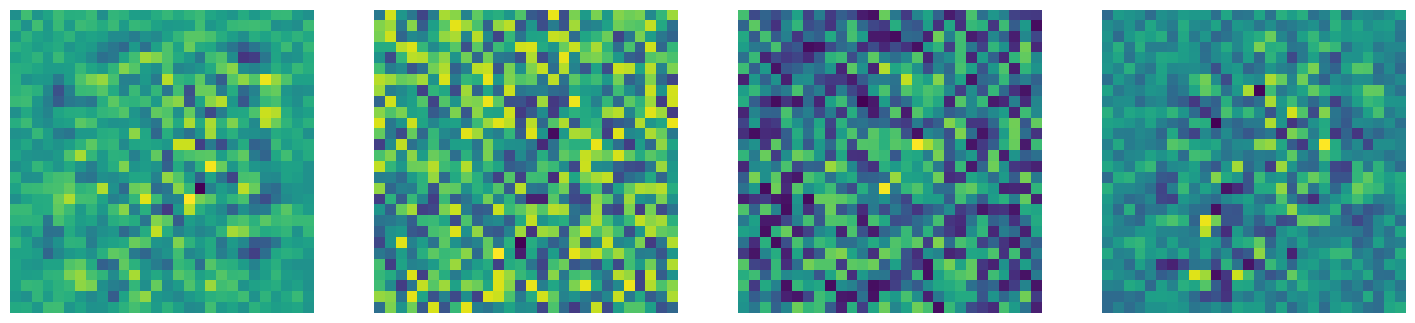

In [10]:
# Visualise a few kernels of the encoder

display_images(None, model.encoder[0].weight, 5)